<a href="https://colab.research.google.com/github/siddhantjain07/DeepLearning/blob/master/VectorizedFeedForwardNetowrks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm.notebook import tqdm
import seaborn as sns 
import imageio
import time 
from IPython.display import HTML

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [4]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

In [5]:
np.random.seed(0)

In [25]:
sns.set()

#Testing Vectorization

In [6]:
N = 100
M = 200
a = np.random.randn(N, M)
b = np.random.randn(N, M)
c = np.zeros((N, M))

In [16]:
#magic command for ipython ntbks, used to count time for excecution of a particular cell
%%time
for i in range(N):
  for j in range(M):
    c[i, j] = a[i, j] * b[i, j]

CPU times: user 19.5 ms, sys: 0 ns, total: 19.5 ms
Wall time: 22.9 ms


In [17]:
%%time 
c = a * b

CPU times: user 508 µs, sys: 65 µs, total: 573 µs
Wall time: 431 µs


In [18]:
%%time 
for i in range(N):
  for j in range(M):
    c[i, j] = np.sin(a[i, j])

CPU times: user 43.1 ms, sys: 0 ns, total: 43.1 ms
Wall time: 45.5 ms


In [20]:
%%time
c = np.sin(a)

CPU times: user 1.05 ms, sys: 103 µs, total: 1.15 ms
Wall time: 775 µs


#Generating Data


In [22]:
data, labels = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


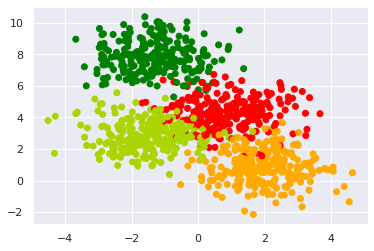

In [26]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [27]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

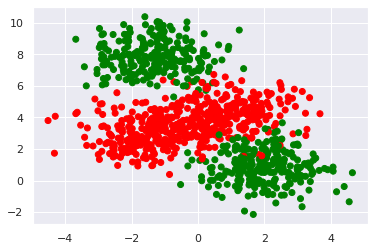

In [28]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

#Multi-Class Classification

In [30]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig,  stratify=labels_orig, random_state=0)
print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape, labels_orig.shape)

(750, 2) (250, 2) (750,) (250,) (1000,)


In [31]:
enc = OneHotEncoder()
# 0 -> [1 0 0 0] , 1 -> [0 1 0 0] , 2 -> [0 0 1 0] , 3 -> [0 0 0 1]
Y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
Y_OH_val = enc.fit_transform(np.expand_dims(Y_val, 1)).toarray()
print(Y_OH_train.shape, Y_OH_val.shape)

(750, 4) (250, 4)


In [41]:
W1 = np.random.randn(2,2)
W2 = np.random.randn(4,2)
print(W1)
print(W2)

[[-0.43151262  1.25058958]
 [-1.62510813  0.32610936]]
[[ 0.78863454  0.24842882]
 [-0.51348324 -1.51242633]
 [-1.60931717  0.57706229]
 [ 0.57307747  0.46945954]]


#Scalar Version

In [42]:
class FF_MultiClass_Scalar:

  def __init__(self, W1, W2):
    self.w1 = W1[0][0].copy()
    self.w2 = W1[0][1].copy()
    self.w3 = W1[1][0].copy()
    self.w4 = W1[1][1].copy()
    self.w5 = W2[0][0].copy()
    self.w6 = W2[0][1].copy()
    self.w7 = W2[1][0].copy()
    self.w8 = W2[1][1].copy()
    self.w9 = W2[2][0].copy()
    self.w10 = W2[2][1].copy()
    self.w11 = W2[3][0].copy()
    self.w12 = W2[3][1].copy()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
    self.b6 = 0




  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))



  def forward_pass(self, x):
    #input layer
    self.x1, self.x2 = x

    #hidden layer
    self.z1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.a1 = self.sigmoid(self.z1)
    self.z2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.a2 = self.sigmoid(self.z2)

    #Output layer
    self.z3 = self.w5*self.a1 + self.w6*self.a2 + self.b3
    self.z4 = self.w7*self.a1 + self.w8*self.a2 + self.b4
    self.z5 = self.w9*self.a1 + self.w10*self.a2 + self.b5
    self.z6 = self.w11*self.a1 + self.w12*self.a2 + self.b6
    sum_exps = np.sum([np.exp(self.z3), np.exp(self.z4), np.exp(self.z5), np.exp(self.z6)])
    self.a3 = np.exp(self.z3) / sum_exps
    self.a4 = np.exp(self.z4) / sum_exps
    self.a5 = np.exp(self.z5) / sum_exps
    self.a6 = np.exp(self.z6) / sum_exps

    return np.array(self.a3, self.a4, self.a5, self.a6)



  def grad(self, x, y):
    self.forward_pass(x)
    self.y1, self.y2, self.y3, self.y4 = y

    self.dz3 = (self.a3 - self.y1)
    self.dz4 = (self.a4 - self.y2)
    self.dz5 = (self.a5 - self.y3)
    self.dz6 = (self.a6 - self.y4)

    self.dw5 = self.dz3 * self.a1
    self.dw6 = self.dz3 * self.a2
    self.db3 = self.dz3

    self.dw7 = self.dz4 * self.a1
    self.dw8 = self.dz4 * self.a2
    self.db4 = self.dz4

    self.dw9 = self.dz5 * self.a1
    self.dw10 = self.dz5 * self.a2
    self.db5 = self.dz5

    self.dw11 = self.dz6 * self.a1
    self.dw12 = self.dz6 * self.a2
    self.db6 = self.dz6

    self.da1 = self.dz3*self.w5 + self.dz4*self.w7 + self.dz5*self.w9 + self.dz6*self.w11
    self.da2 = self.dz3*self.w6 + self.dz4*self.w8 + self.dz5*self.w10 + self.dz6*self.w12

    self.dz1 = self.da1 * self.a1 * (1 - self.a1)
    self.dz2 = self.da2 * self.a2 * (1 - self.a2)

    self.dw1 = self.dz1 * self.x1
    self.dw2 = self.dz1 * self.x2
    self.b1 = self.dz1

    self.dw3 = self.dz2 * self.x1
    self.dw4 = self.dz2 * self.x2
    self.db2 = self.dz2



  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False, display_weight=False):
      
    if display_loss:
      loss = {}
    
    for i in tqdm(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, dw11, dw12, db1, db2, db3, db4, db5, db6  = [0]*18
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        dw11 += self.dw11
        dw12 += self.dw12
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db4 += self.db4
        db2 += self.db5
        db3 += self.db6
        
      m = X.shape[0]
      self.w1 -= (learning_rate * (dw1 / m))
      self.w2 -= (learning_rate * (dw2 / m))
      self.w3 -= (learning_rate * (dw3 / m))
      self.w4 -= (learning_rate * (dw4 / m))
      self.w5 -= (learning_rate * (dw5 / m))
      self.w6 -= (learning_rate * (dw6 / m))
      self.w7 -= (learning_rate * (dw7 / m))
      self.w8 -= (learning_rate * (dw8 / m))
      self.w9 -= (learning_rate * (dw9 / m))
      self.w10 -= (learning_rate * (dw10 / m))
      self.w11 -= (learning_rate * (dw11 / m))
      self.w12 -= (learning_rate * (dw12 / m))
      self.b1 -= (learning_rate * (db1 / m))
      self.b2 -= (learning_rate * (db2 / m))
      self.b3 -= (learning_rate * (db3 / m))
      self.b4 -= (learning_rate * (db4 / m))
      self.b5 -= (learning_rate * (db5 / m))
      self.b6 -= (learning_rate * (db6 / m))
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
    
    if display_loss:
      Wt1 = [[self.w1, self.w3], [self.w2, self.w4]]
      Wt2 = [[self.w5, self.w6, self.w7, self.w8], [self.w9, self.w10, self.w11, self.w12]]
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
      


  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)


#Weight Vectorized Version
